# Logistic Regression from Scratch

### What is Logistic Regression?

Logistic Regression is a **classification algorithm** used to predict the probability of a binary outcome (0 or 1, Yes or No, True or False). Despite its name, it's used for classification, not regression.

### The Sigmoid Function

The core of logistic regression is the **sigmoid function** (also called logistic function):

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Where:
- $z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$ (linear combination of features)
- $w$ = weights
- $b$ = bias
- $x$ = input features

The sigmoid function maps any real number to a value between 0 and 1, which can be interpreted as a probability.

**Properties of Sigmoid:**
- Output range: (0, 1)
- When $z = 0$, $\sigma(z) = 0.5$
- When $z \to \infty$, $\sigma(z) \to 1$
- When $z \to -\infty$, $\sigma(z) \to 0$

### Hypothesis

The hypothesis for logistic regression is:

$$h(x) = \sigma(w^Tx + b) = \frac{1}{1 + e^{-(w^Tx + b)}}$$

This gives us the probability that the output is 1:

$$P(y=1|x) = h(x)$$
$$P(y=0|x) = 1 - h(x)$$

### Log-Likelihood Function

For logistic regression, we use the **log-likelihood** as our objective function:

$$\log L(w, b) = \sum_{i=1}^{m} [y_i \log(h(x_i)) + (1-y_i) \log(1-h(x_i))]$$

We want to **maximize** this function (or minimize the negative log-likelihood).

### Gradient Ascent

Since we want to maximize the log-likelihood, we use **gradient ascent** (opposite of gradient descent):

$$w := w + \alpha \frac{\partial \log L}{\partial w}$$
$$b := b + \alpha \frac{\partial \log L}{\partial b}$$

Where $\alpha$ is the learning rate.

The gradients turn out to be:

$$\frac{\partial \log L}{\partial w} = \sum_{i=1}^{m} (y_i - h(x_i)) x_i$$
$$\frac{\partial \log L}{\partial b} = \sum_{i=1}^{m} (y_i - h(x_i))$$

### Decision Boundary

To make predictions, we use a threshold (typically 0.5):
- If $h(x) \geq 0.5$, predict class 1
- If $h(x) < 0.5$, predict class 0

The decision boundary is the line where $h(x) = 0.5$, which occurs when $w^Tx + b = 0$.

### Algorithm Steps

1. Initialize weights $w$ and bias $b$ (usually to 0)
2. For each iteration:
   - Calculate predictions using sigmoid function
   - Calculate gradients
   - Update weights and bias using gradient ascent
3. Repeat until convergence or max iterations reached

## Imports

In [188]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import math

## `LogisticRegression` Class

In [189]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

class LogisticRegressor:
    def __init__(self, num_weights):
        self.weights = [0] * num_weights
        self.bias = 0.0
        pass

    def fit(self, X, y, threshold=0.5, max_iter=1000, learning_rate=0.01):
        for _ in range(max_iter):
            # Gradient Ascent on Log-likelihood function
            predictions = self.predict(X, test=False, threshold=threshold)
            diffs = np.subtract(y, predictions)
            gradients = np.dot(X.T, diffs)
            self.weights = np.add(self.weights, learning_rate * gradients)
            self.bias = np.add(self.bias, learning_rate * sum(diffs))
        return

    def predict(self, X, test=True, threshold=0.5):
        if test:
            predictions = [np.dot(sample, self.weights) + self.bias for sample in X]
            predictions = [1 if sigmoid(prediction) > threshold else 0 for prediction in predictions]
            return predictions
        else:
            predictions = [np.dot(sample, self.weights) + self.bias for sample in X]
            predictions = [sigmoid(prediction) for prediction in predictions]
            return predictions

    def evaluate(self, X_test, y_true):
        y_pred = self.predict(X_test)
        return accuracy_score(y_true, y_pred)

## Generate Random Data

Generate random data with two input features and two output class labels.

In [190]:
X, y = make_classification(
    n_samples=100, 
    n_features=2, 
    n_redundant=0, 
    n_informative=2, 
    n_clusters_per_class=1
)

In [191]:
model = LogisticRegressor(num_weights=2)

model.fit(X, y)
model.evaluate(X, y)

0.95

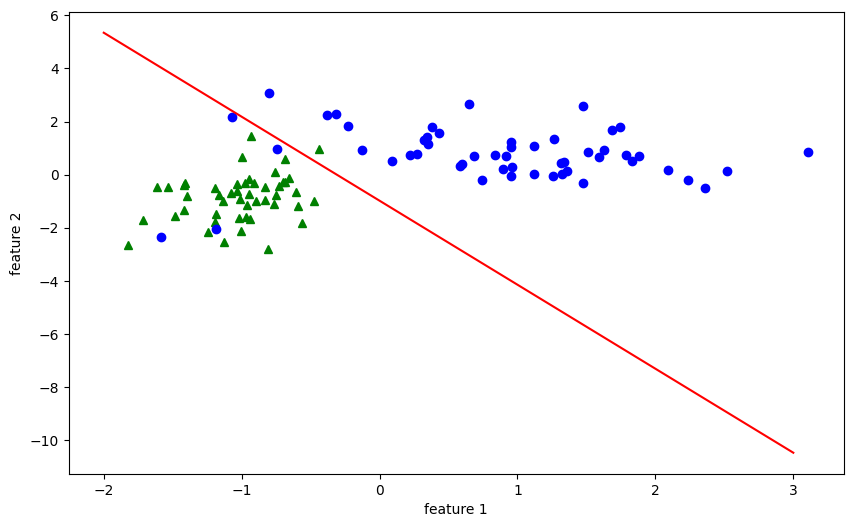

In [192]:
temp = list(range(int(X.min()), int(X.max() + 1)))
tempy = [-(model.weights[0] * x1 + model.bias) / model.weights[1] for x1 in temp]

plt.figure(figsize=(10, 6))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.plot(temp, tempy, "-r")
plt.show()